In [1]:
import readfargo3d as fg
import numpy as pl
import numpy as np
import matplotlib.pyplot as plt

path = './p3disof_test/'
#path = './bae2017_03jup1400x512/'

itime = 95
r0 = 1.0
fargo3d    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=path)
fargo3d_init    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path)

phi = fargo3d.phi
rad  = fargo3d.r
theta = fargo3d.theta

#phi   = 0.5*(phi[:-1] + phi[1:])                                                                                                                   \     $
#rad   = 0.5*(rad[:-1] + rad[1:])

rad3d, phi3d, theta3d = (np.meshgrid(rad, phi, theta))

nx = len(phi)
ny = len(rad)
nz = len(theta)
print(itime*10)
#-------------------------3d sum------------------
#rho_init   = fargo3d_init.rho.sum(axis=2)
#rho   = fargo3d.rho.sum(axis=2)
#vphi_init   = fargo3d_init.vphi.sum(axis=2)
#vphi   = fargo3d.vphi.sum(axis=2)
#vrad     = fargo3d.vr.sum(axis=2)
#vrad_init = fargo3d_init.vr.sum(axis=2)
#vtheta = fargo3d.vtheta.sum(axis=2)
#vtheta_init = fargo3d_init.vtheta.sum(axis=2)
#-------------------------3d slice------------------
rho_init   = fargo3d_init.rho[:,:,:]
rho   = fargo3d.rho[:,:,:]
vphi_init   = fargo3d_init.vphi[:,:,:]
vphi   = fargo3d.vphi[:,:,:]
vrad     = fargo3d.vr[:,:,:]
vrad_init = fargo3d_init.vr[:,:,:]
vtheta = fargo3d.vtheta[:,:,:]
vtheta_init = fargo3d_init.vtheta[:,:,:] #all have shape (1399,511,65)
omegap = np.loadtxt(path+'planet0.dat')[itime][-1]
vphi += omegap*rad3d

omegapinit = np.loadtxt(path+'planet0.dat')[0][-1]
vphi_init += omegapinit*rad3d

dphi = np.abs(phi3d[1:,1:,1:]-phi3d[:-1,:-1,:-1]) 
drad = np.abs(rad3d[1:,1:,1:]-rad3d[:-1,:-1,:-1]) #shape 1399, 511, 65
dtheta = np.abs(theta3d[1:,1:,1:]-theta3d[:-1,:-1,:-1])#
dvphi = vphi[1:,1:,1:]-vphi[:-1,:-1,:-1]
dvtheta = vtheta[1:,1:,1:]-vtheta[:-1,:-1,:-1]
dvrad = vrad[1:,1:,1:]-vrad[:-1,:-1,:-1]

pv_rad = ((1/(rad3d*np.sin(phi3d))[1:,1:,1:])*(((vtheta*np.sin(phi3d))[1:,1:,1:]-(vtheta*np.sin(phi3d))[:-1,:-1,:-1])/dphi - (dvphi/dtheta)))/rho[1:,1:,1:]
pv_phi = ((1/(rad3d)[1:,1:,1:])*((dvrad)/(dtheta*np.sin(phi3d)[1:,1:,1:]) - (((rad3d*vtheta)[1:,1:,1:]-(rad3d*vtheta)[:-1,:-1,:-1])/drad)))/rho[1:,1:,1:]
pv_theta = ((1/rad3d)[1:,1:,1:]*(((rad3d*vphi)[1:,1:,1:]-(rad3d*vphi)[:-1,:-1,:-1])/(drad) - (dvrad/dphi)))/rho[1:,1:,1:]
#------------------------------initial conditions--------------------------------------
dvphi_init = vphi_init[1:,1:,1:]-vphi_init[:-1,:-1,:-1]
dvtheta_init = vtheta_init[1:,1:,1:]-vtheta_init[:-1,:-1,:-1]
dvrad_init = vrad_init[1:,1:,1:]-vrad_init[:-1,:-1,:-1]

pv_rad_init = ((1/(rad3d*np.sin(phi3d))[1:,1:,1:])*(((vtheta_init*np.sin(phi3d))[1:,1:,1:]-(vtheta_init*np.sin(phi3d))[:-1,:-1,:-1])/dphi - (dvphi_init/dtheta)))/rho_init[1:,1:,1:]
pv_phi_init = ((1/(rad3d)[1:,1:,1:])*((dvrad_init)/(dtheta*np.sin(phi3d)[1:,1:,1:]) - (((rad3d*vtheta_init)[1:,1:,1:]-(rad3d*vtheta_init)[:-1,:-1,:-1])/drad)))/rho_init[1:,1:,1:]
pv_theta_init = ((1/rad3d)[1:,1:,1:]*(((rad3d*vphi_init)[1:,1:,1:]-(rad3d*vphi_init)[:-1,:-1,:-1])/(drad) - (dvrad_init/dphi)))/rho_init[1:,1:,1:]

#-------------------------------------------

print('done')

950
done


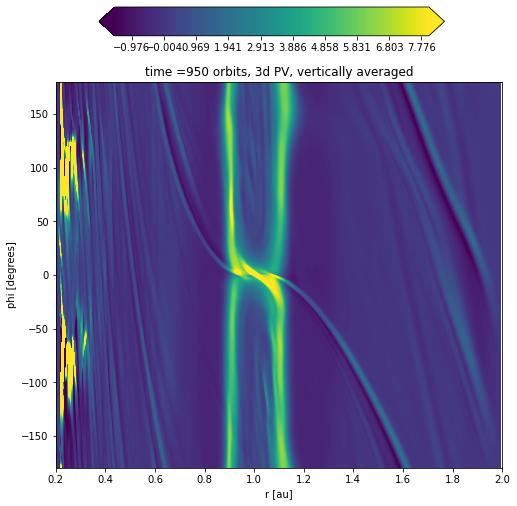

In [24]:
vmin = -1.5
vmax = 8
levels = np.linspace(vmin,vmax,128)

fig, ax = plt.subplots(figsize=(8,8))
cp = ax.contourf(fargo3d.r[1:], fargo3d.phi[1:]*180/np.pi, ((pv_theta[:,:,:]-pv_theta_init[:,:,:])/pv_theta_init[:,:,:]).mean(axis=2), levels=levels,extend='both')
ax.set_xlim(0.2,2)
#ax.set_ylim(160,170)
ax.set_xlabel('r [au]')
ax.set_ylabel('phi [degrees]')
ax.set_title(f'time ='+ str(itime*10) +' orbits, 3d PV, vertically averaged')
cax = fig.add_axes([0.2, 0.9, 0.6, 0.05])
fig.colorbar(cp, cax=cax,orientation='horizontal')
fig.subplots_adjust(top=0.82, bottom=0.15)
plt.savefig('PV_3dimage3mavg.png',dpi = 300)


(0.5, 2.0)

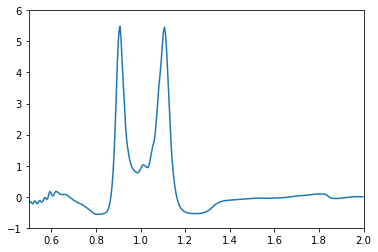

In [25]:
plt.plot(fargo3d.r[1:],(((pv_theta[:,:,:]-pv_theta_init[:,:,:])/pv_theta_init[:,:,:]).mean(axis=2).mean(axis=0)), label = '3d_disk')
plt.ylim(-1,6)
plt.xlim(.5,2)

In [ ]:
#3D Potential Vorticity using "HORSESHOE DRAG IN THREE-DIMENSIONAL GLOBALLY ISOTHERMAL DISKS" Paper
import readfargo3d as fg
import numpy as pl
import numpy as np
import matplotlib.pyplot as plt

path = './p3disof_test/'
#path = './bae2017_03jup1400x512/'

nstart = 80
itime = nstart
r0 = 1.0
fargo3d    = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=True,dir=path)
fargo3d_init    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path)
#fargo_2d = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)
#fargo_2dinit    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)



phi = np.loadtxt(path +'domain_x.dat')
rad1  = np.loadtxt(path +'domain_y.dat')[3:-3]

phi   = 0.5*(phi[:-1] + phi[1:]) #what does this mean?                                                                                                                  \     $

rad1   = 0.5*(rad1[:-1] + rad1[1:])

rad2d, phi2d = np.meshgrid(rad1, phi) #explain meshgrid?                                                                                                                 \     $


X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)

nx = len(phi)
ny = len(rad1)
nz = len(fargo3d.theta)
nf = nstart
print(nf*10)
#-------------------------3d sum------------------
#rho_init   = fargo3d_init.rho.sum(axis=2)
#rho   = fargo3d.rho.sum(axis=2)
#vphi_init   = fargo3d_init.vphi.sum(axis=2)
#vphi   = fargo3d.vphi.sum(axis=2)
#vrad     = fargo3d.vr.sum(axis=2)
#vrad_init = fargo3d_init.vr.sum(axis=2)
#vtheta = fargo3d.vtheta.sum(axis=2)
#vtheta_init = fargo3d_init.vtheta.sum(axis=2)
#-------------------------3d slice------------------
rho_init   = fargo3d_init.rho[:,:,:]
rho   = fargo3d.rho[:,:,:]
vphi_init   = fargo3d_init.vphi[:,:,:]
vphi   = fargo3d.vphi[:,:,:]
vrad     = fargo3d.vr[:,:,:]
vrad_init = fargo3d_init.vr[:,:,:]
vtheta = fargo3d.vtheta[:,:,:]
vtheta_init = fargo3d_init.vtheta[:,:,:]
omegap = np.loadtxt(path+'planet0.dat')[itime][-1]
vphi += omegap*rad2d

omegapinit = np.loadtxt(path+'planet0.dat')[0][-1]
vphi_init += omegapinit*rad2d
vmin = -1
vmax = 5
levels = np.linspace(vmin,vmax,128)


dphi = np.abs(fargo3d.phi[0]-fargo3d.phi[1])
drad = np.abs(rad2d[0,1:]-rad2d[0,:-1])

